In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# (一)鳶尾花

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
x = iris.data
y = iris.target

### 以花萼長度和花瓣長度作為預測的變項

In [6]:
X = x[:,[1,3]]
Y = y

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(X, Y,
                                                test_size = 0.2,
                                                random_state = 0)

### 真正的解答

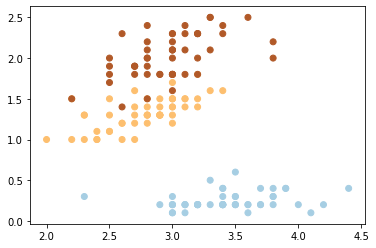

In [9]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap = 'Paired')

In [10]:
from sklearn.svm import SVC

### Step 1. 開一台數據學習機

In [11]:
clf = SVC(gamma='auto')

### Step 2. 訓練

In [12]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Step 3. 預測

In [13]:
y_predict = clf.predict(x_test)

### 以誤差值做區分(y_predict－y_test)

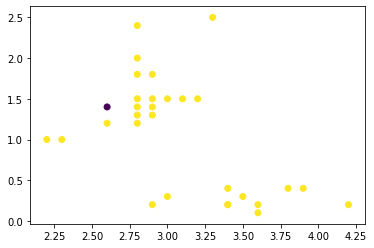

In [14]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_predict-y_test)

## 繪出結果

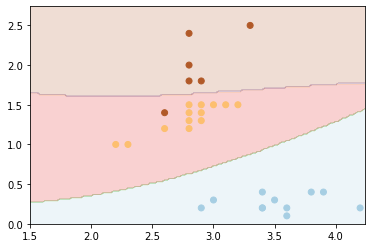

In [15]:
x0 = np.arange(1.5, 4.25, 0.02)
y0 = np.arange(0, 2.75, 0.02)
xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, cmap = 'Paired', alpha = 0.2)

plt.scatter(x_test[:,0], x_test[:,1], cmap = 'Paired', c = y_test)